For starters, lets import pandas and check for what sorts of missing values we have.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt 

In [55]:
player_data = pd.read_csv('starcraft_player_data.csv')
player_data 
player_data_dropped = player_data.dropna()
print(f'Size of dataframe: {player_data.size} Size after dropNA: {player_data_dropped.size}')
player_data = player_data_dropped

Size of dataframe: 67800 Size after dropNA: 66800


Now we can check out what some of the columns look like statistically using DataFrame.describe().

In [66]:
player_data.describe()

,GameID,LeagueIndex,Age,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.00000,3340.000000,3340.000000,3340.000000,3340.000000
mean,4718.617964,4.121257,21.647904,114.572041,0.004024,0.000364,4.315569,0.000094,0.000380,0.003434,40.713822,64.206232,5.266340,22.11976,0.001031,6.540719,0.000060,0.000142
std,2656.893051,1.447896,4.206341,48.098942,0.004725,0.000210,2.332845,0.000159,0.000359,0.000965,17.053777,19.032398,1.500627,7.44025,0.000520,1.858700,0.000111,0.000266
min,52.000000,1.000000,16.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.632600,2.038900,5.00000,0.000077,2.000000,0.000000,0.000000
25%,2422.500000,3.000000,19.000000,79.235700,0.001247,0.000202,3.000000,0.000000,0.000139,0.002743,29.328000,50.915075,4.261350,17.00000,0.000682,5.000000,0.000000,0.000000
50%,4788.000000,4.000000,21.000000,107.070300,0.002447,0.000349,4.000000,0.000039,0.000278,0.003376,37.058900,61.296100,5.087050,22.00000,0.000904,6.000000,0.000000,0.000021
75%,6994.250000,5.000000,24.000000,140.112300,0.004947,0.000493,6.000000,0.000113,0.000507,0.004004,48.512750,74.031975,6.027050,27.00000,0.001258,8.000000,0.000087,0.000182
max,9271.000000,7.000000,44.000000,389.831400,0.043088,0.001648,10.000000,0.003019,0.003688,0.007971,237.142900,176.372100,18.558100,58.00000,0.005149,13.000000,0.000902,0.003084


After thinking about it for a couple minutes, we don't really need to worry the LeagueIndex column, since we're going to be trying to predict that.
In order to avoid getting difficult-to-interpret graphs, I decided to take random samples from each numerical column, and create a box plot. This makes it easy to run multiple times, and get a good idea of what some of the trends are amongst the group.

Before we do that, it turns out we still have some issues.

First Issue: Every column except HoursPerWeek and TotalHours come up as dtype 'float64'.
Second Issue: It looked like theres still are some missing values (or "?'s", as they show up in Excel).

To fix it, let try first to just replace those columns with cleaned up versions.

In [108]:
new_weekly_column = list()
new_total_column = list()
row = 0
rows = list()

def find_weird_values(column):
    row = 0
    rows = list()
    for entry in player_data[column]:
        if entry == '?':
            rows.append(row)
        else:
            row = row + 1
    return rows
    

for column in player_data.columns:
    print(f'{column} {find_weird_values(column)}')

#new_player_data = player_data.drop(1841).drop(358).drop(1840)
#new_player_data.drop(columns='HoursPerWeek').drop(columns="TotalHours")
#new_player_data["HoursPerWeek"] = new_weekly_column


GameID []
LeagueIndex []
Age []
HoursPerWeek [1841]
TotalHours [358, 1840]
APM []
SelectByHotkeys []
AssignToHotkeys []
UniqueHotkeys []
MinimapAttacks []
MinimapRightClicks []
NumberOfPACs []
GapBetweenPACs []
ActionLatency []
ActionsInPAC []
TotalMapExplored []
WorkersMade []
UniqueUnitsMade []
ComplexUnitsMade []
ComplexAbilitiesUsed []


Age
HoursPerWeek


KeyError: "None of [Index(['HoursPerWeek'], dtype='object')] are in the [columns]"

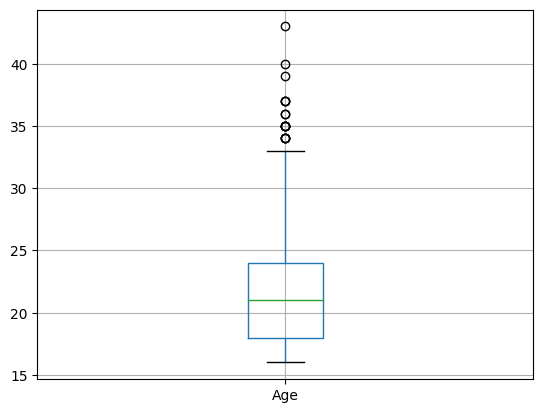

In [84]:
variables = new_player_data.columns.values[2:18]
sample_size = 1000

for var in variables:
    print(var)
    sample_of_players = player_data.sample(n=sample_size)
    sample_of_players.boxplot(column=var)


My first idea was to use logistic regression to with rank as the predictor variable.

In [37]:
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification